# 실습예제 : 타이타닉 생존자 예측

- 캐글에서 제공하는 타이타닉 탑승자 데이터 
- April 15, 1912
    
- https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 파악

In [4]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.  데이터 전처리

### 1) 결측치 파악 및 처리
- isnull() 
- fillna() 

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
# 평균값으로 처리한다고 가정
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [21]:
titanic.Age.isna().sum()

0

In [23]:
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
# 값을 모른다는 뜻으로 -> N으로 대체
titanic.Embarked.fillna('N', inplace=True)
titanic.Cabin.fillna('N', inplace=True)

In [26]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
# 함수화
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

### 2) 문자열, 정수열 변수(피처) 빈도 분포 확인

- value_counts()

In [35]:
for col in ['Sex','Survived','Pclass','Cabin','Embarked']:
    print(f'{col} 분포\n {titanic[col].value_counts()}\n')

Sex 분포
 Sex
male      577
female    314
Name: count, dtype: int64

Survived 분포
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass 분포
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Cabin 분포
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 분포
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64



### 3) 문자열 변수 Cabin값 변경

In [36]:
# 등급만 표기하도록 변경
titanic.Cabin = titanic.Cabin.str[:1]

In [37]:
titanic.Cabin.value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

### 4) 성별에 따른 생존자수 분포(EDA)

In [46]:
titanic.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [43]:
titanic.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [49]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

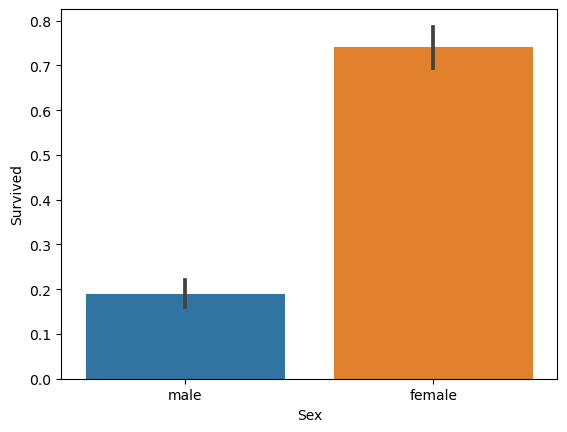

In [44]:
sns.barplot(x='Sex',y='Survived', data=titanic)
plt.show()

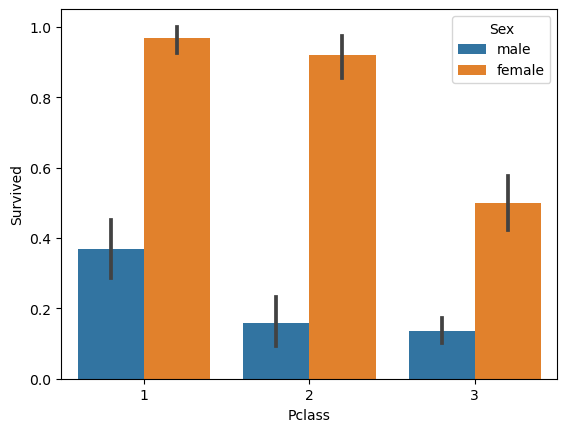

In [47]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=titanic)
plt.show()

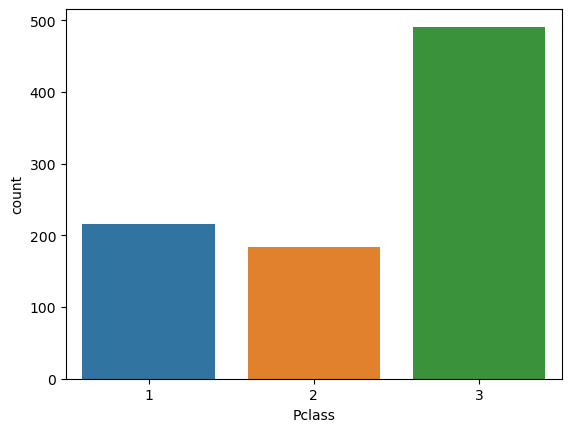

In [48]:
sns.countplot(x='Pclass', data=titanic)
plt.show()

**Remind 문제**

성별에 따른 생존자 분할표(교차표)를 사용하여 성별에 따라 생존자 분포가 다르다고 할 수 있는지 가설검정을 수행하시오.

카이제곱 검정: 두 가지 범주형 변수간의 독립성을 확인
- 범주형 데이터의 분포가 통계적으로 유의미한 차이가 있는지를 판단하는 데 적합한 방법
- 타이타닉 데이터에서 성별에 따라 생존 여부가 독립적인지 아니면 관련이 있는지 -> 카이제곱 검정을 사용하여 독립성 평가


In [50]:
# 둘 다 범주형 데이터이기 때문에 카이제곱검정을 사용하는 것이 좋다.
from scipy.stats.contingency import chi2_contingency

In [53]:
freq = titanic.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
freq

Survived,0,1
Sex,,
female,81,233
male,468,109


In [55]:
chi2, p, dof, expected = chi2_contingency(freq, correction=True)
p

1.1973570627755645e-58

In [60]:
alpha = 0.05
if p < alpha:
    print("H0기각 -> 성별에 따라 생존자 분포가 다르다.")
else:
    print("H0 기각x -> 성별에 따라 생존자 분포가 다르지 않다.")

H0기각 -> 성별에 따라 생존자 분포가 다르다.


### 5) 수치형 변수의 구간화(binning)

#### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [61]:
titanic.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [63]:
# cut을 이용하여 category화
labels = ['Baby','Child','Teen','Student','YoungAdult','Adult','Elderly']
bins = [0,5,12,18,25,35,60,100]
titanic['Age_cut'] = pd.cut(titanic.Age, labels=labels, bins=bins)

In [65]:
titanic.Age_cut.value_counts()

Age_cut
YoungAdult    373
Adult         195
Student       162
Teen           70
Baby           44
Child          25
Elderly        22
Name: count, dtype: int64

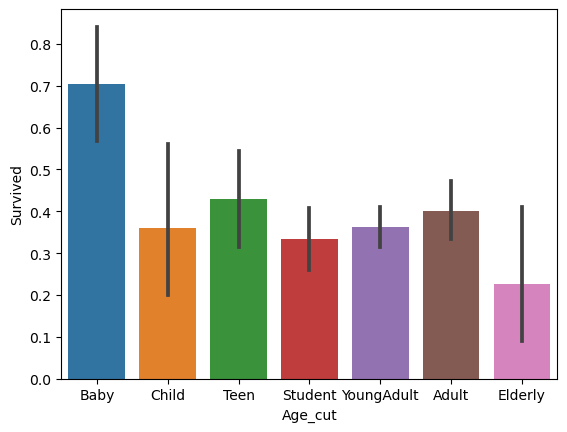

In [66]:
sns.barplot(data=titanic,x='Age_cut',y='Survived')
plt.show()

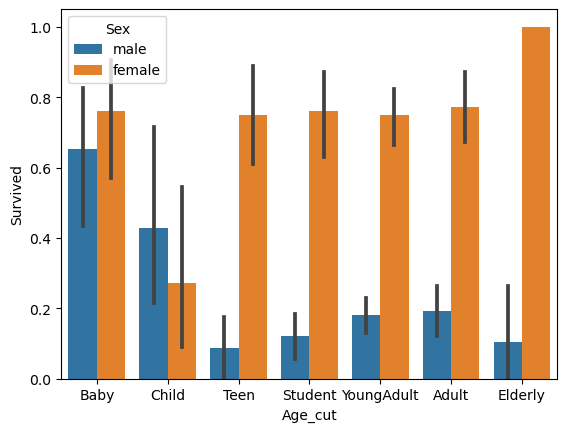

In [67]:
sns.barplot(data=titanic,x='Age_cut',y='Survived', hue='Sex')
plt.show()

### 6) 인코딩(encoding)

- Sex, Cabin, Embarked 변수에 대하여 레이블 인코딩

In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(titanic.Sex)
result = encoder.transform(titanic.Sex)
result
encoder.classes_

array(['female', 'male'], dtype=object)

In [71]:
# 범주형 데이터를 수치화 하는 과정
for ftr in ['Sex','Cabin','Embarked']: 
    encoder = LabelEncoder()
    encoder.fit(titanic[ftr])
    titanic[ftr] = encoder.transform(titanic[ftr])

In [75]:
def encode_features(df):
    for ftr in ['Sex','Cabin','Embarked']: 
        encoder = LabelEncoder()
        encoder.fit(df[ftr])
        df[ftr] = encoder.transform(df[ftr])
    return df

In [77]:
encode_features(titanic).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,YoungAdult


In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    int64   
 11  Embarked     891 non-null    int64   
 12  Age_cut      891 non-null    category
dtypes: category(1), float64(2), int64(8), object(2)
memory usage: 84.9+ KB


### 7) 삭제

- PassengerId, Name, Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False) 함수 사용

In [ ]:
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.info()

### 전처리 함수 작성

In [84]:
from sklearn.preprocessing import LabelEncoder

# 결측치 처리
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 레이블 인코딩
def encode_features(df):
    for ftr in ['Sex','Cabin','Embarked']: 
        encoder = LabelEncoder()
        encoder.fit(df[ftr])
        df[ftr] = encoder.transform(df[ftr])
    return df

# 불필요 열 삭제
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 전처리 함수
def preprocessing_features(df):
    df = fill_na(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

---

## 3. 생존자 예측 모델링

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [123]:
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')
train_df['train/test'] = 'train'
test_df['train/test'] = 'test'

data = pd.concat([train_df, test_df], axis=0)
data.iloc[888:894]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,train
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train/test   1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


### 2단계. 데이터 전처리
- 피처 데이터 세트에 preprocessing_features()를 적용해 데이터 가공

In [125]:
data = preprocessing_features(data)
data.iloc[888:894]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train/test
888,0.0,3,0,29.881138,1,2,23.4500,185,3,train
889,1.0,1,1,26.000000,0,0,30.0000,77,0,train
890,0.0,3,1,32.000000,0,0,7.7500,185,2,train
0,NaN,3,1,34.500000,0,0,7.8292,185,2,test
1,NaN,3,0,47.000000,1,0,7.0000,185,3,test
2,NaN,2,1,62.000000,0,0,9.6875,185,2,test


In [127]:
train = data[data['train/test'] == 'train']
test = data[data['train/test'] == 'test']

train_y = train.Survived
train_x = train.drop(['Survived', 'train/test'], axis=1)

test_x = test.drop(['Survived', 'train/test'], axis=1)

In [128]:
train_x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,185,3
1,1,0,38.0,1,0,71.2833,106,0
2,3,0,26.0,0,0,7.9250,185,3


### 3단계. Data Split

In [129]:
# validation_dataset: 20%
from sklearn.model_selection import train_test_split

tr_x, val_x, tr_y, val_y = train_test_split(train_x,train_y,test_size = 0.2,
                                                   random_state=11)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

- 3개의 분류 알고리즘으로 예측 수행하고 평가
    - 결정 트리 : DecisionTreeClassifier
    - 랜덤 포레스트 : RandomForestClassifier
    - 로지스틱 회귀 : LogisticRegression
    
- 예측 성능 평가 지표 : accuracy_score()

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [130]:
# 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 모델 학습
dt_clf.fit(tr_x, tr_y)
rf_clf.fit(tr_x, tr_y)
lr_clf.fit(tr_x, tr_y)

# 평가

# DecisionTreeClassifier
dt_pred = dt_clf.predict(val_x)
dt_acc = accuracy_score(val_y, dt_pred)

# RandomForestClassifier
rf_pred = rf_clf.predict(val_x)
rf_acc = accuracy_score(val_y, rf_pred)

# LogisticRegression
lr_pred = lr_clf.predict(val_x)
lr_acc = accuracy_score(val_y, lr_pred)

print(f'DecisionTreeClassifier: {dt_acc:.4f}\nRandomForestClassifier: {rf_acc:.4f}\nLogisticRegression: {lr_acc:.4f}')

DecisionTreeClassifier: 0.7989
RandomForestClassifier: 0.8380
LogisticRegression: 0.8547


In [142]:
# test 데이터셋에 학습된 모델 적용하여 예측

# test_x['Fare']의 nan이 있어 진행이 안되어 임의적으로 평균으로 fillna()
test_x.Fare.isna().sum()
test_x['Fare'] = test_x.Fare.fillna(test_x['Fare'].mean())

dt_pred2 = dt_clf.predict(test_x)
dt_acc2 = accuracy_score(val_y, dt_pred)

rf_pred2 = rf_clf.predict(test_x)
rf_acc2 = accuracy_score(val_y, dt_pred)

lr_pred2 = lr_clf.predict(test_x)
lr_acc2 = accuracy_score(val_y, dt_pred)

print(f'DecisionTreeClassifier: {dt_acc2:.4f}\nRandomForestClassifier: {rf_acc2:.4f}\nLogisticRegression: {lr_acc2:.4f}')

DecisionTreeClassifier: 0.7989
RandomForestClassifier: 0.7989
LogisticRegression: 0.7989


### 5단계. 교차 검증을 통한 모델 성능 향상

- 결정 트리 모델에 대하여 교차검증
- KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

#### 1) KFold를 이용한 교차검증

In [ ]:
from sklearn.model_selection import KFold

In [159]:
def exec_kfold(clf,x,y,folds=5, shuffle=True):
    kfold = KFold(n_splits = folds, shuffle=shuffle)
    scores = []
    
    for i, (tr_idx, val_idx) in enumerate(kfold.split(x)):
        
        # 데이터 나누기
        tr_x, val_x = x.values[tr_idx], x.values[val_idx]
        tr_y, val_y = y.values[tr_idx], y.values[val_idx] 
        
        # 학습 및 예측, 정확도 저장
        clf.fit(tr_x, tr_y)
        pred_y = clf.predict(val_x)
        acc = accuracy_score(val_y, pred_y)
        scores.append(acc)
        
        print(f'cv{i+1}: accuracy = {acc:.4f}')
    
    print(f'평균 정확도: {np.mean(scores):.4f}')

In [160]:
print('DecisionTree')
exec_kfold(dt_clf, train_x, train_y, folds=4)
print('\nRandomForest')
exec_kfold(rf_clf, train_x, train_y, folds=4)
print('\nLogisticRegression')
exec_kfold(lr_clf, train_x, train_y, folds=4, shuffle=False)

DecisionTree
cv1: accuracy = 0.7933
cv2: accuracy = 0.8090
cv3: accuracy = 0.7640
cv4: accuracy = 0.7472
평균 정확도: 0.7784

RandomForest
cv1: accuracy = 0.8156
cv2: accuracy = 0.8258
cv3: accuracy = 0.7697
cv4: accuracy = 0.8146
평균 정확도: 0.8064

LogisticRegression
cv1: accuracy = 0.7933
cv2: accuracy = 0.7865
cv3: accuracy = 0.7584
cv4: accuracy = 0.8034
평균 정확도: 0.7854


#### 2) cross_val_score()를 이용해 교차 검증 수행

In [ ]:
from sklearn.model_selection import cross_val_score

In [174]:
def exec_cross_val(clf,x,y,scoring='accuracy',cv=5):
    scores = cross_val_score(clf,x, y, scoring= scoring, cv=cv)
    print(f'cross_val_score: {scores}')
    print(f'평균 졍확도: {np.mean(scores):.4f}')

In [175]:
print('DecisionTree')
exec_cross_val(dt_clf, train_x, train_y, cv=4)
print('\nRandomForest')
exec_cross_val(rf_clf, train_x, train_y, cv=4)
print('\nLogisticRegression')
exec_cross_val(lr_clf, train_x, train_y, cv=4)

DecisionTree
cross_val_score: [0.73743017 0.76966292 0.76404494 0.78651685]
평균 졍확도: 0.7644

RandomForest
cross_val_score: [0.73184358 0.80898876 0.79213483 0.8258427 ]
평균 졍확도: 0.7897

LogisticRegression
cross_val_score: [0.81005587 0.7752809  0.78651685 0.81460674]
평균 졍확도: 0.7966


### 6단계. 하이퍼파라미터 튜닝

- GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

In [206]:
from sklearn.model_selection import GridSearchCV

clf = [dt_clf, rf_clf, lr_clf]
for i in clf:
    if i is lr_clf:
        params = {'C': [2,3,5,10]}
        grid = GridSearchCV(i,param_grid=params, cv=3)
        grid.fit(train_x,train_y)
        best_dt = grid.best_estimator_
        pred = best_dt.predict(val_x)
        print(f'{i}: {accuracy_score(val_y,pred):.4f}')
        print(f'최적의 하이퍼파라미터: {grid.best_params_}')
        print(f'최적의 교차 검증 정확도: {grid.best_score_:.4f}\n')

    else:
        params={'max_depth': [2,3,5,10], 'min_samples_split':[2,3,5],'min_samples_leaf': [1,5,8]}
        grid = GridSearchCV(i,param_grid=params, cv=3)
        grid.fit(tr_x,tr_y)
        best_dt = grid.best_estimator_
        pred = best_dt.predict(val_x)
        print(f'{i}: {accuracy_score(val_y,pred):.4f}')
        print(f'최적의 하이퍼파라미터: {grid.best_params_}')
        print(f'최적의 교차 검증 정확도: {grid.best_score_:.4f}\n')


DecisionTreeClassifier(random_state=11): 0.7887
최적의 하이퍼파라미터: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
최적의 교차 검증 정확도: 0.8057

RandomForestClassifier(random_state=11): 0.8380
최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
최적의 교차 검증 정확도: 0.8109

LogisticRegression(): 0.7746
최적의 하이퍼파라미터: {'C': 5}
최적의 교차 검증 정확도: 0.7953



------------------------------------------------